In [5]:
import pandas as pd

In [6]:
from google.colab import files
uploaded = files.upload()

Saving 2025-VeloCityX-Expanded-Fan-Engagement-Data.csv to 2025-VeloCityX-Expanded-Fan-Engagement-Data (1).csv


In [9]:
filename = list(uploaded.keys())[0]

In [10]:
data= pd.read_csv(filename)

In [ ]:
data.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   User ID                                  100 non-null    object
 1   Fan Challenges Completed                 100 non-null    int64 
 2   Predictive Accuracy (%)                  100 non-null    int64 
 3   Virtual Merchandise Purchases            100 non-null    int64 
 4   Sponsorship Interactions (Ad Clicks)     100 non-null    int64 
 5   Time on Live 360 (mins)                  100 non-null    int64 
 6   Real-Time Chat Activity (Messages Sent)  100 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 5.6+ KB


In [12]:
data.describe()

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,5.790000,74.990000,2.670000,8.680000,129.350000,25.050000
std,2.825908,14.033506,2.064882,6.340315,38.634358,14.163101
min,1.000000,50.000000,0.000000,0.000000,60.000000,0.000000
25%,3.000000,62.000000,1.000000,2.000000,98.000000,11.000000
50%,6.000000,77.000000,2.000000,8.000000,124.500000,25.500000
75%,8.000000,86.500000,5.000000,15.000000,160.000000,35.000000
max,10.000000,98.000000,6.000000,19.000000,199.000000,49.000000


In [13]:
data.isnull().sum()

,0
User ID,0
Fan Challenges Completed,0
Predictive Accuracy (%),0
Virtual Merchandise Purchases,0
Sponsorship Interactions (Ad Clicks),0
Time on Live 360 (mins),0
Real-Time Chat Activity (Messages Sent),0


In [14]:
duplicates= data.duplicated()

In [15]:
duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


Observation: No missing value and No duplicate value.

In [16]:
data.dtypes

,0
User ID,object
Fan Challenges Completed,int64
Predictive Accuracy (%),int64
Virtual Merchandise Purchases,int64
Sponsorship Interactions (Ad Clicks),int64
Time on Live 360 (mins),int64
Real-Time Chat Activity (Messages Sent),int64


In [17]:
data_new= data.drop(columns=['User ID'])

In [18]:
data_new

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,5,80,3,10,120,20
1,8,60,1,8,100,35
2,3,90,0,6,90,5
3,7,70,2,15,140,40
4,2,50,5,3,60,8
...,...,...,...,...,...,...
95,8,86,6,14,98,22
96,3,82,3,1,159,24
97,1,91,1,9,92,34
98,8,93,0,1,160,40


In [19]:
data_new.dtypes

,0
Fan Challenges Completed,int64
Predictive Accuracy (%),int64
Virtual Merchandise Purchases,int64
Sponsorship Interactions (Ad Clicks),int64
Time on Live 360 (mins),int64
Real-Time Chat Activity (Messages Sent),int64


In [20]:
data_new.fillna(data_new.median(), inplace=True)

In [21]:
columns_to_check = ['Fan Challenges Completed', 'Predictive Accuracy (%)',
                    'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)',
                    'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']

In [22]:
assert (data_new[columns_to_check] >= 0).all().all()

Observation: No negative values

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
data_new[columns_to_check] = scaler.fit_transform(data_new[columns_to_check])

In [25]:
data_new

,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,0.444444,0.625000,0.500000,0.526316,0.431655,0.408163
1,0.777778,0.208333,0.166667,0.421053,0.287770,0.714286
2,0.222222,0.833333,0.000000,0.315789,0.215827,0.102041
3,0.666667,0.416667,0.333333,0.789474,0.575540,0.816327
4,0.111111,0.000000,0.833333,0.157895,0.000000,0.163265
...,...,...,...,...,...,...
95,0.777778,0.750000,1.000000,0.736842,0.273381,0.448980
96,0.222222,0.666667,0.500000,0.052632,0.712230,0.489796
97,0.000000,0.854167,0.166667,0.473684,0.230216,0.693878
98,0.777778,0.895833,0.000000,0.052632,0.719424,0.816327


In [26]:
data_new.head()


,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,0.444444,0.625000,0.500000,0.526316,0.431655,0.408163
1,0.777778,0.208333,0.166667,0.421053,0.287770,0.714286
2,0.222222,0.833333,0.000000,0.315789,0.215827,0.102041
3,0.666667,0.416667,0.333333,0.789474,0.575540,0.816327
4,0.111111,0.000000,0.833333,0.157895,0.000000,0.163265


In [32]:
def find_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    # Define outliers as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers
outliers = find_outliers_iqr(data[columns_to_check])


In [33]:
print(data[outliers.any(axis=1)])

Empty DataFrame
Columns: [User ID, Fan Challenges Completed, Predictive Accuracy (%), Virtual Merchandise Purchases, Sponsorship Interactions (Ad Clicks), Time on Live 360 (mins), Real-Time Chat Activity (Messages Sent)]
Index: []


correlation matrix to identify relationships

In [ ]:
correlations = data_new.corr()

In [ ]:
correlations[['Virtual Merchandise Purchases',
              'Sponsorship Interactions (Ad Clicks)']].sort_values(by='Virtual Merchandise Purchases', ascending=False)

,Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks)
Virtual Merchandise Purchases,1.000000,0.070550
Fan Challenges Completed,0.159378,-0.065239
Sponsorship Interactions (Ad Clicks),0.070550,1.000000
Predictive Accuracy (%),0.022194,0.056612
Time on Live 360 (mins),-0.007527,-0.073929
Real-Time Chat Activity (Messages Sent),-0.044676,0.191292


Preparing the data for Modeling

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_new['Purchased'] = data_new['Virtual Merchandise Purchases'] > 0

In [ ]:
X = data_new[['Fan Challenges Completed',
                  'Predictive Accuracy (%)',
                  'Sponsorship Interactions (Ad Clicks)',
                  'Time on Live 360 (mins)',
                  'Real-Time Chat Activity (Messages Sent)']]
y = data_new['Purchased']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training a LogisticRegression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00         2
        True       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 0  2]
 [ 0 18]]


Correlation Analysis

In [ ]:
activities = ['Fan Challenges Completed', 'Time on Live 360 (mins)',
              'Real-Time Chat Activity (Messages Sent)']

In [ ]:
targets = ['Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)']


In [ ]:
corr_activities_targets = data_new[activities + targets].corr()


In [ ]:
print("Correlation between user activities and merchandise purchases/sponsorship interactions:")
print(corr_activities_targets[['Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)']].loc[activities])


Correlation between user activities and merchandise purchases/sponsorship interactions:
                                         Virtual Merchandise Purchases  \
Fan Challenges Completed                                      0.159378   
Time on Live 360 (mins)                                      -0.007527   
Real-Time Chat Activity (Messages Sent)                      -0.044676   

                                         Sponsorship Interactions (Ad Clicks)  
Fan Challenges Completed                                            -0.065239  
Time on Live 360 (mins)                                             -0.073929  
Real-Time Chat Activity (Messages Sent)                              0.191292  


In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

User Activities and Purchases

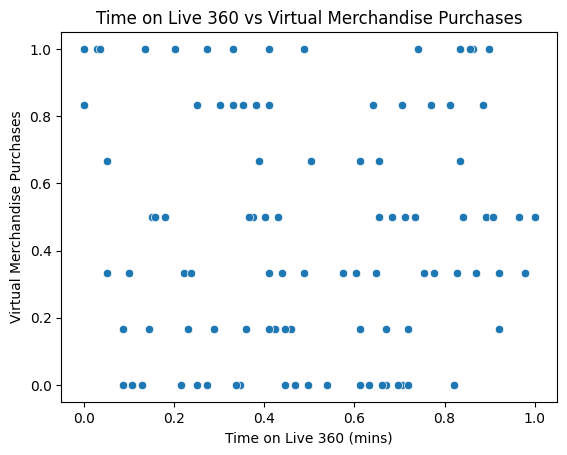

In [ ]:
sns.scatterplot(x='Time on Live 360 (mins)', y='Virtual Merchandise Purchases', data=data_new)
plt.title('Time on Live 360 vs Virtual Merchandise Purchases')
plt.show()

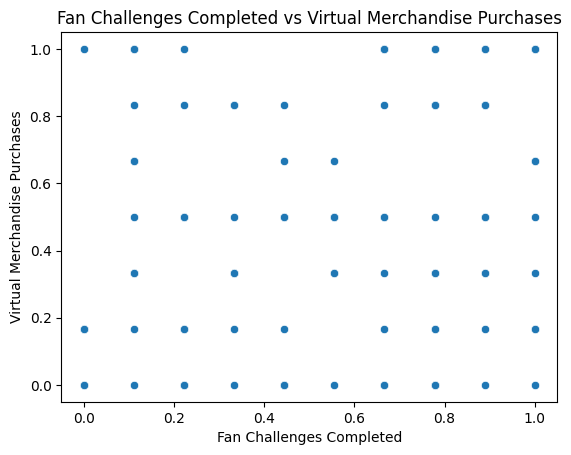

In [ ]:
sns.scatterplot(x='Fan Challenges Completed', y='Virtual Merchandise Purchases', data=data_new)
plt.title('Fan Challenges Completed vs Virtual Merchandise Purchases')
plt.show()

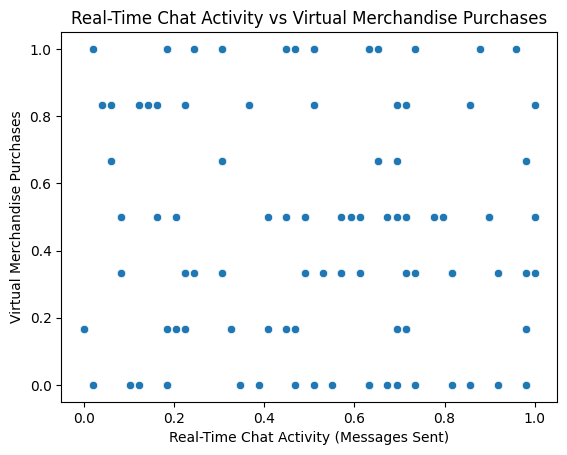

In [ ]:
sns.scatterplot(x='Real-Time Chat Activity (Messages Sent)', y='Virtual Merchandise Purchases', data=data_new)
plt.title('Real-Time Chat Activity vs Virtual Merchandise Purchases')
plt.show()

User Activities and Sponsorship Interactions

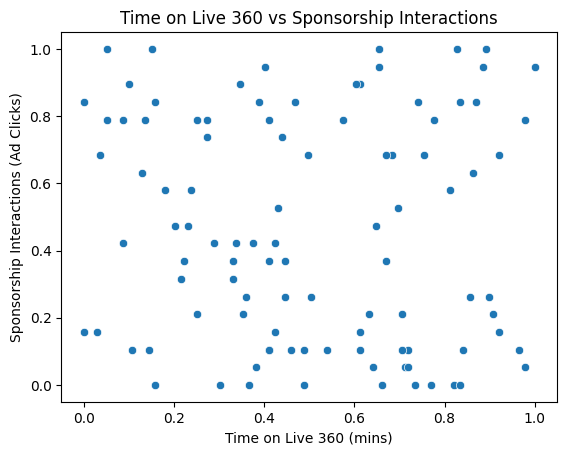

In [ ]:
sns.scatterplot(x='Time on Live 360 (mins)', y='Sponsorship Interactions (Ad Clicks)', data=data_new)
plt.title('Time on Live 360 vs Sponsorship Interactions')
plt.show()

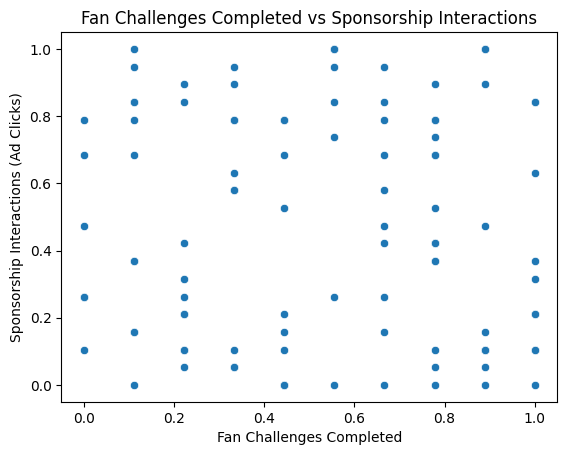

In [ ]:
sns.scatterplot(x='Fan Challenges Completed', y='Sponsorship Interactions (Ad Clicks)', data=data_new)
plt.title('Fan Challenges Completed vs Sponsorship Interactions')
plt.show()

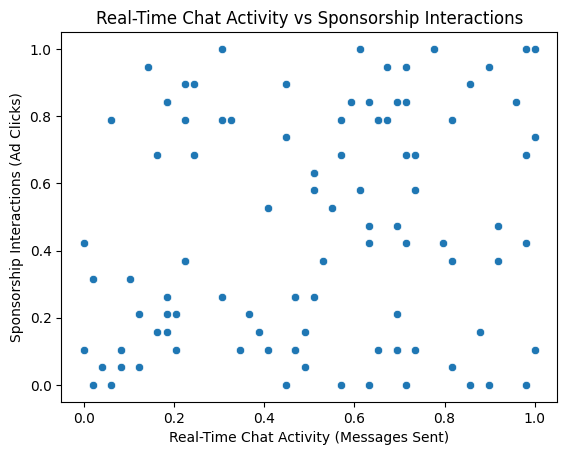

In [ ]:
sns.scatterplot(x='Real-Time Chat Activity (Messages Sent)', y='Sponsorship Interactions (Ad Clicks)', data=data_new)
plt.title('Real-Time Chat Activity vs Sponsorship Interactions')
plt.show()

Apply K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_clustering = data_new[['Fan Challenges Completed', 'Time on Live 360 (mins)',
                             'Real-Time Chat Activity (Messages Sent)', 'Virtual Merchandise Purchases',
                             'Sponsorship Interactions (Ad Clicks)']]

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_clustering_scaled = scaler.fit_transform(X_clustering)

In [ ]:
wcss = []

In [ ]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_clustering_scaled)
    wcss.append(kmeans.inertia_)

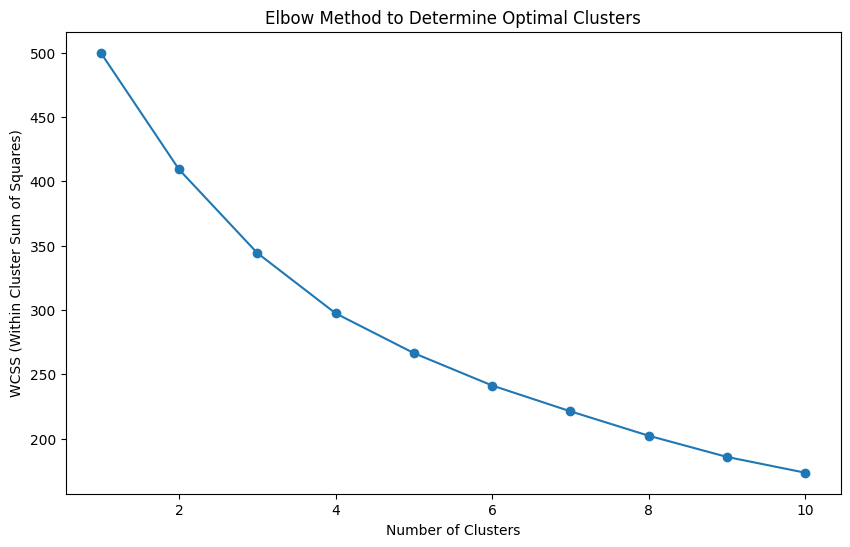

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)

In [ ]:
clusters = kmeans.fit_predict(X_clustering_scaled)

In [ ]:
data_new['Cluster'] = clusters

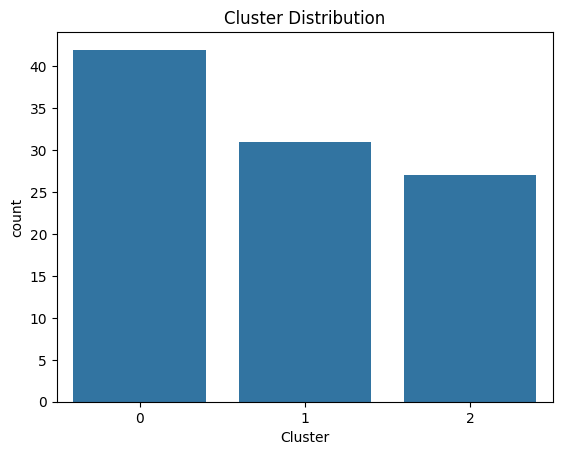

In [ ]:
sns.countplot(x='Cluster', data=data_new)
plt.title('Cluster Distribution')
plt.show()

In [ ]:
cluster_analysis = data_new.groupby('Cluster').mean()

In [ ]:
print("Cluster analysis:\n", cluster_analysis)

Cluster analysis:
          Fan Challenges Completed  Predictive Accuracy (%)  \
Cluster                                                      
0                        0.470899                 0.516369   
1                        0.713262                 0.528898   
2                        0.419753                 0.517747   

         Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
Cluster                                                                        
0                             0.329365                              0.734336   
1                             0.817204                              0.344652   
2                             0.197531                              0.153996   

         Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  \
Cluster                                                                     
0                       0.480130                                 0.679300   
1                       0.504061      

Observation: Cluster 0 shows a low engagement users, Cluster 1 be moderate users, and Cluster 2 could be highly engaged users, the purchase more merchandise.

To identify the most engaged user groups on merchandise, apply clustering algorithms like K-Means to segment users based on engagement and purchasing behavior. Analyze the resulting clusters to determine which groups shows the highest engagement and spending, using features such as Time on Live 360 and Fan Challenges Completed. Use tree-based models like Random Forests to assess feature importance, identifying which factors, such as Time on Live 360 or Purchase Frequency, have the strongest impact on predicting merchandise purchases. This analysis helps prioritize high-value user clusters for targeted marketing strategies.